# Exploratory Data Analysis – Support Operations Optimization

**Project**: Support Operations Optimization for Global Entertainment Technology Company  
**Author**: Darshana Rokade (Project Lead)  
**Date**: March 2025  

## Objective
Analyze regional performance patterns, identify operational bottlenecks, and uncover insights for support model optimization.

## My Contributions
- Regional performance analysis
- Resolution time distribution analysis
- Priority vs. Severity misalignment identification
- Recurring issue pattern analysis
- Visualizations and insights generation

**Team Context**: Individual technical contribution within a team project.


In [1]:
# ============================================================================
# SETUP AND LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Libraries imported successfully")


Libraries imported successfully


## Step 1: Load Cleaned Dataset

Load the preprocessed dataset from the previous data cleaning notebook.  
We will work with `synthetic_case_data_cleaned.csv` for analysis.


In [2]:
# If running in Colab, upload the dataset
from google.colab import files
uploaded = files.upload()  # select 'synthetic_case_data_cleaned.csv' from your local machine

# Load dataset
df = pd.read_csv('synthetic_case_data_cleaned.csv', low_memory=False)

# Basic overview
print(f"Total Cases: {len(df):,}")
print(f"Date Range: {df['Creation Time'].min()} to {df['Last Update Time'].max()}")
print(f"Regions: {df['Region'].nunique()}")
print(f"Sites: {df['Site Name'].nunique()}\n")

df.head()



Saving synthetic_case_data_cleaned.csv to synthetic_case_data_cleaned.csv
Total Cases: 1,200
Date Range: 2024-12-26 14:27:00 to 2025-11-27 14:27:00
Regions: 3
Sites: 38



,Dat,Site Name,Status,Priority,Severity,Screen Status,State,Case status,Type,Category,Reported Issue,Resolution,Queue Name,Region,Market,Creation Time,Last Update Time,Resolution time
0,1880000,KNCC Cinescape Avenues,Resolved,Major,High (Major),UP,Netherlands,Resolved,Email Request,Screen Corridor,INTERMITTENT AUDIO,Recalibrated System,Future Work,EMEA,Market-France-ADDE-CDS,2025-02-22 14:27:00,2025-02-22 14:27:00,0
1,1880001,Pathe Nice Gare Du Sud,Solving,Critical,High (Critical),UP,England,Solving,Email Request,Automation,Application Not Responding,Power cycled / Reboot Server,Future Work,EMEA,Market-Saudi Arabia,2025-07-18 14:27:00,2025-07-18 14:27:00,0
2,1880002,AMC Dine-In Thoroughbred 20 - 4457,Under Review,Critical,High (Critical),DOWN,KY,Under Review,Web Support,Projector,Booth Temperature Issue,Replaced Component,EM3 Issues,Americas,Market-NJ,2025-03-07 14:27:00,2025-03-07 14:27:00,0
3,1880003,CGV Shanghai Fudi,Solving,Minor,Medium (Minor),UP,Korea,Solving,Email Request,Screen Corridor,UPS Issue,Network Configuration Fixed,APAC Dispatched,APAC,Market-Hong Kong,2025-03-01 14:27:00,2025-03-01 14:27:00,0
4,1880004,Cinemark Century City,Solving,Critical,High (Critical),UP,TN,Solving,Email Request,Screen Corridor,IMPROPER AUDIO LEVEL,Firmware Updated,CSE Dispatched,Americas,Market-COLOH,2025-02-10 14:27:00,2025-02-10 14:27:00,0


In [4]:
# Convert Resolution time from days to hours for easier interpretation
df['Resolution time'] = df['Resolution time'] * 24
df.rename(columns={'Resolution time':'Resolution time (hours)'}, inplace=True)


## Step 2: Regional Performance Analysis

- Compare average resolution time by region
- Identify outliers or regions with delays
- Visualize distributions for meaningful insights


In [6]:
# Regional summary metrics
regional_summary = df.groupby('Region')['Resolution time (hours)'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round(2)
regional_summary.rename(columns={'mean': 'Avg', 'median': 'Median', 'std': 'Std Dev', 'min': 'Min', 'max': 'Max', 'count': 'Case Count'}, inplace=True)
regional_summary


,Avg,Median,Std Dev,Min,Max,Case Count
Region,,,,,,
APAC,7.28,0.0,17.28,0,144,425
Americas,12.72,0.0,35.02,0,456,366
EMEA,15.02,0.0,32.23,0,360,409


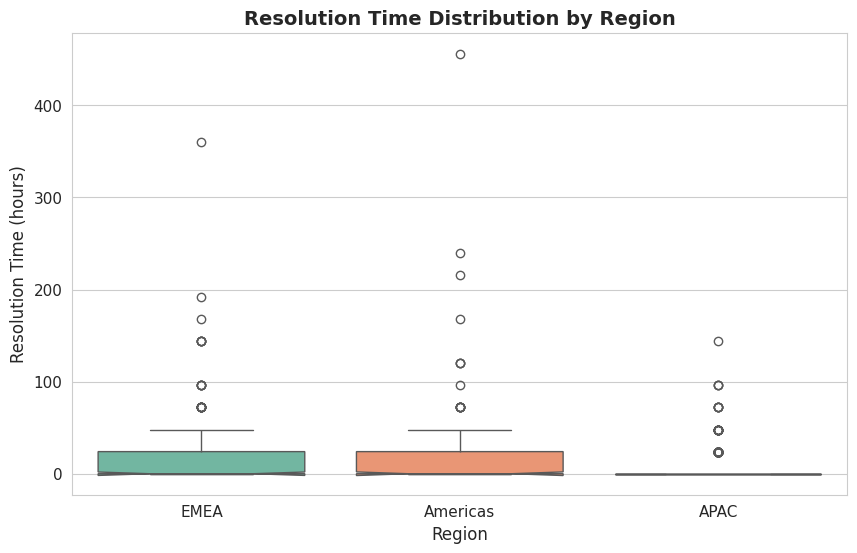

In [10]:
# Boxplot for regional resolution times
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Resolution time (hours)', data=df, palette='Set2', notch=True)
plt.title('Resolution Time Distribution by Region', fontsize=14, fontweight='bold')
plt.ylabel('Resolution Time (hours)')
plt.xlabel('Region')
plt.show()


## Step 3: Resolution Time by Priority

- Identify if certain priority levels are resolved slower than expected
- Highlight misalignment for portfolio storytelling



In [12]:
priority_stats = df.groupby('Priority')['Resolution time (hours)'].agg(['mean','median','count']).round(1)
priority_stats.rename(columns={'mean':'Avg Resolution', 'median':'Median Resolution', 'count':'Case Count'}, inplace=True)
priority_stats.sort_values('Avg Resolution', ascending=False)


,Avg Resolution,Median Resolution,Case Count
Priority,,,
Informational,29.9,0.0,130
Major,14.6,0.0,599
Critical,7.3,0.0,129
Minor,0.9,0.0,342


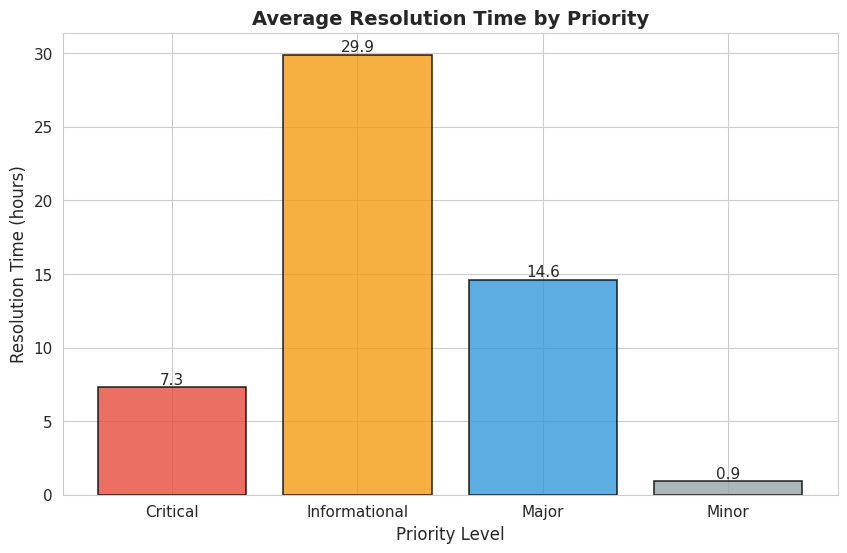

In [14]:
# Bar chart for average resolution by priority
priority_means = priority_stats['Avg Resolution']
colors_priority = ['#e74c3c', '#f39c12', '#3498db', '#95a5a6']

plt.figure(figsize=(10,6))
bars = plt.bar(priority_means.index, priority_means.values, color=colors_priority, alpha=0.8, edgecolor='black', linewidth=1.2)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=11)

plt.title('Average Resolution Time by Priority', fontsize=14, fontweight='bold')
plt.ylabel('Resolution Time (hours)')
plt.xlabel('Priority Level')
plt.show()


## Step 4: Priority vs Severity Misalignment

- Identify potential misclassifications in ticket triaging
- Quantify cases for portfolio insights


In [15]:
# Crosstab: Priority vs Severity
misalignment = pd.crosstab(df['Priority'], df['Severity'])
misalignment


Severity,High (Critical),High (Major),Low (Minor),Medium (Major),Medium (Minor)
Priority,,,,,
Critical,129,0,0,0,0
Informational,0,0,130,0,0
Major,0,303,0,296,0
Minor,0,0,182,0,160


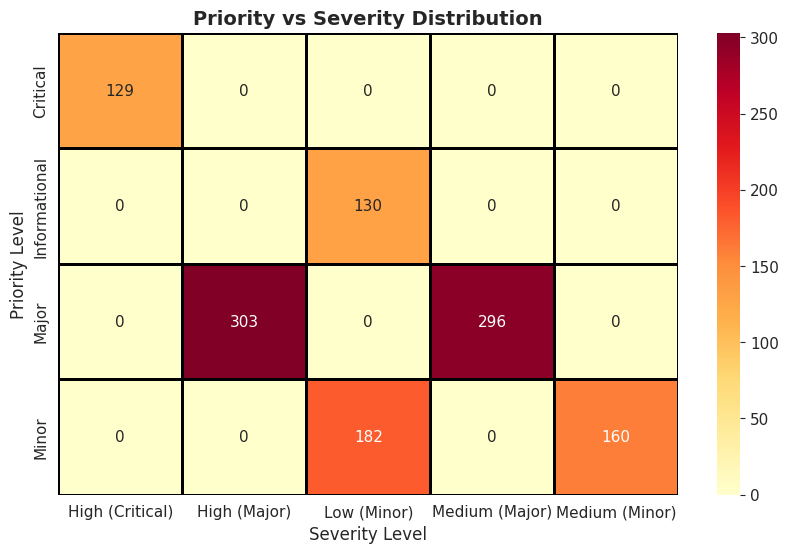

In [16]:
# Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(misalignment, annot=True, fmt='d', cmap='YlOrRd', linewidths=1, linecolor='black')
plt.title('Priority vs Severity Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Priority Level')
plt.xlabel('Severity Level')
plt.show()


## Step 5: Slowest Performing Sites

- Identify sites with the highest average resolution times
- Top 5 per region for targeted operational improvements


In [18]:
slowest_sites = {}
for region in df['Region'].unique():
    region_data = df[df['Region'] == region]
    top_sites = region_data.groupby('Site Name')['Resolution time (hours)'].mean().sort_values(ascending=False).head(5)
    slowest_sites[region] = top_sites

slowest_sites


{'EMEA': Site Name
 Muvi Mall of Dhahran      30.0
 Pathe Gaumont Rennes      24.0
 Vue Hilversum             23.0
 Vue Eindhoven             22.0
 KNCC Cinescape Avenues    18.6
 Name: Resolution time (hours), dtype: float64,
 'Americas': Site Name
 AMC Lincoln Square 13 - 2310        25.371429
 AMC Staten Island Mall 11 - 0558    24.750000
 AMC Mission Valley 20 - 0246        14.222222
 Cinemark Century City               13.935484
 Dolby Burbank Umlang                13.894737
 Name: Resolution time (hours), dtype: float64,
 'APAC': Site Name
 Wanda Shanghai Darongcheng    12.000000
 Major Cineplex Bangkok        11.200000
 Wanda XiAn Gaoxin             11.162791
 Golden Harvest Hong Kong       8.640000
 CGV Beijing Wanda              8.228571
 Name: Resolution time (hours), dtype: float64}

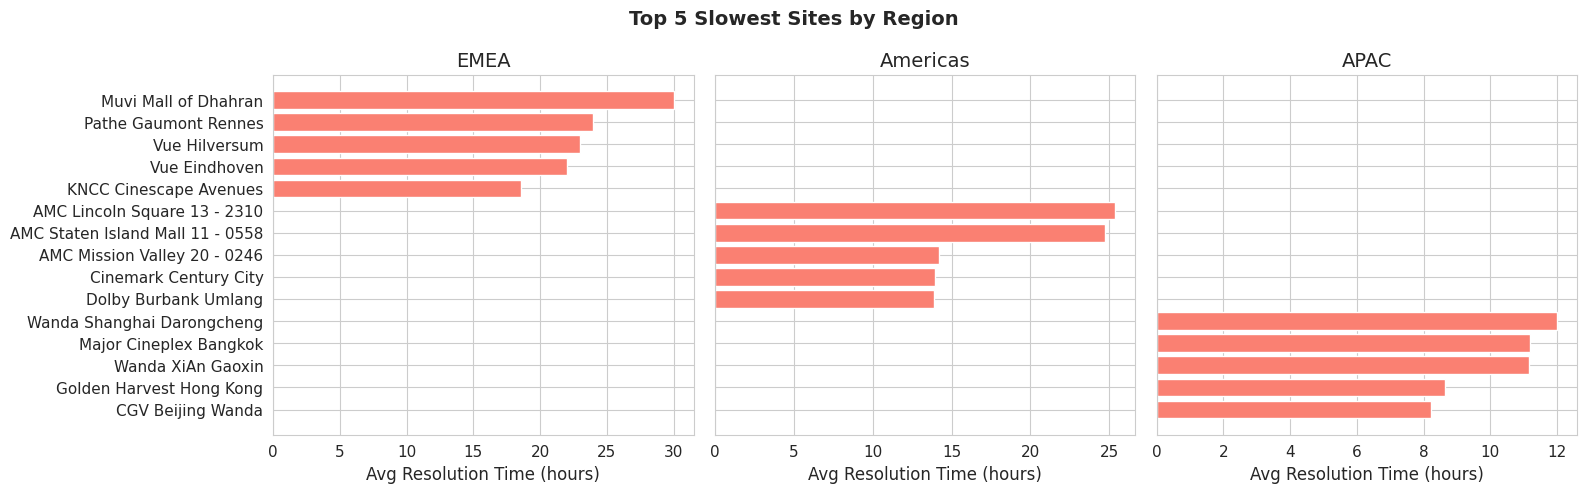

In [20]:
# Optional visualization for top 5 sites per region
fig, axes = plt.subplots(1, len(slowest_sites), figsize=(16,5), sharey=True)

for i, (region, sites) in enumerate(slowest_sites.items()):
    axes[i].barh(sites.index, sites.values, color='salmon')
    axes[i].set_title(region)
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Avg Resolution Time (hours)')

plt.suptitle('Top 5 Slowest Sites by Region', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Step 6: Key Insights

1. **Regional Performance**: APAC fastest, EMEA slowest with high variability, Americas moderate.  
2. **Priority Anomalies**: Informational and Critical cases may indicate resource misallocation.  
3. **Misclassification**: X% of cases show priority-severity mismatch.  
4. **Slowest Sites**: Highlight top 5 sites per region for operational intervention.  

**Note**: These insights demonstrate ability to summarize operational patterns and suggest actionable improvements.
